<h2 id="60-単語ベクトルの読み込みと表示">60. 単語ベクトルの読み込みと表示</h2>
<p>Google Newsデータセット（約1,000億単語）での<a href="https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing">学習済み単語ベクトル</a>（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．</p>


In [34]:
!gunzip data/GoogleNews-vectors-negative300.bin.gz

gunzip: can't stat: data/GoogleNews-vectors-negative300.bin.gz (data/GoogleNews-vectors-negative300.bin.gz.gz): No such file or directory


pymagnitudeはアップデートが全然されていないのでもう使わなくていい

In [ ]:
!pip install gensim

In [3]:
from gensim.models import KeyedVectors

# 学習済みモデルを読み込む
# modelは単語辞書形式で中身はベクトル
model = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True) 

print(type(model))  # <class 'gensim.models.keyedvectors.KeyedVectors'>
print(model.vectors.shape)      # 語彙数 x ベクトル次元数 を表示
print(model['United_States'])   # United Statesの単語ベクトルを表示

<class 'gensim.models.keyedvectors.KeyedVectors'>
(3000000, 300)
[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541

<h2 id="61-単語の類似度">61. 単語の類似度</h2>
<p>“United States”と”U.S.”のコサイン類似度を計算せよ．</p>


In [50]:
model.similarity('United_States', 'U.S.')  # 0.73107743

0.73107743

In [51]:
# いろいろ試してみる
print(model.similarity('apple', 'Apple'))
print(model.similarity('apple', 'banana'))
print(model.similarity('apple', 'tomato'))
print(model.similarity('red', 'pink'))
print(model.similarity('man', 'men'))
print(model.similarity('woman', 'man'))
print(model.similarity('make', 'tomato'))

0.3786772
0.5318407
0.5608182
0.60843086
0.5489763
0.76640123
0.055056807


<h2 id="62-類似度の高い単語10件">62. 類似度の高い単語10件</h2>
<p>“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．</p>


In [52]:
# デフォルトでtopnは10なので指定しなくても良い
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [53]:
# 関数を使わずに実装したかったけど単語名をイテレータで取り出す方法が分からなかった
import numpy as np
# コサイン類似度を求める関数
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

tmp_max_sim = -1
tmp_max = ''
us = model['United_States']
# from itertools import islice
# for k_v in islice(model.vectors, 3):
#     print(k_v)
    # similarity = cos_sim(us, v)
    # if tmp_max_sim < similarity:
    #     tmp_max_sim = similarity
    #     tmp_max = k

<h2 id="63-加法構成性によるアナロジー">63. 加法構成性によるアナロジー</h2>
<p>“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．</p>


In [2]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.5168809294700623),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

In [5]:
# ちょっと結果が違う？？
# 自分自身の単語を消しているのは良いとして、値もちょっと違うみたい
v = (model['Spain'] + model['Athens'])  - model['Madrid'] 
model.most_similar(v)

[('Athens', 0.7528455257415771),
 ('Greece', 0.6685472130775452),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351787209510803),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489651679993),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615200996399),
 ('Athens_Greece', 0.5034109950065613)]

In [3]:
# ちょっと結果が違う？？
# 自分自身の単語を消しているのは良いとして、値もちょっと違うみたい
v = model['Spain'] - model['Madrid'] + model['Athens'] 
model.most_similar(v)

[('Athens', 0.7528455257415771),
 ('Greece', 0.6685472130775452),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351787209510803),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489651679993),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615200996399),
 ('Athens_Greece', 0.5034109950065613)]

In [55]:
# いろいろ試してみる
# king - man + woman
print(model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1))
# cat - cute + cool
print(model.most_similar(positive=['cat', 'cool'], negative=['cute'], topn=5))
# tomorrow - today + this
print(model.most_similar(positive=['tomorrow', 'this'], negative=['today'], topn=5))
# エジプト - カイロ + 東京
print(model.most_similar(positive=['Egypt', 'Tokyo'], negative=['Cairo'], topn=5))
# カイロ - エジプト + 日本
print(model.most_similar(positive=['Cairo', 'Japan'], negative=['Egypt'], topn=5))

[('queen', 0.7118192911148071)]
[('cats', 0.48307326436042786), ('dog', 0.46519735455513), ('pet', 0.39809876680374146), ('kitten', 0.3963969349861145), ('feline', 0.39326348900794983)]
[('next', 0.5432273149490356), ('hopefully', 0.5405917763710022), ('another', 0.5219475626945496), ("'ll", 0.5118502974510193), ('happens', 0.4855425953865051)]
[('Japan', 0.7753520011901855), ('Japans', 0.6358110904693604), ('Japanese', 0.6233928203582764), ('South_Korea', 0.6048110127449036), ('Korea', 0.5547140836715698)]
[('Tokyo', 0.777794599533081), ('Nagoya', 0.6788070797920227), ('Yokohama', 0.6726033091545105), ('Fukuoka', 0.6508273482322693), ('Maebashi', 0.637511670589447)]


<h2 id="64-アナロジーデータでの実験">64. アナロジーデータでの実験</h2>
<p><a href="http://download.tensorflow.org/data/questions-words.txt">単語アナロジーの評価データ</a>をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．</p>


In [ ]:
# !wget http://download.tensorflow.org/data/questions-words.txt -P data/

--2023-06-20 17:50:31--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 2404:6800:4004:80f::2010, 142.250.198.16
Connecting to download.tensorflow.org (download.tensorflow.org)|2404:6800:4004:80f::2010|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: 'data/questions-words.txt.1'

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.1s    

2023-06-20 17:50:32 (4.49 MB/s) - 'data/questions-words.txt.1' saved [603955/603955]



In [ ]:
# 先頭から10個取り出す
!cat data/questions-words.txt | head

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba
cat: stdout: Broken pipe


In [ ]:
# 関係性を説明する行がコロンから始まっているので取り出す
!cat data/questions-words.txt | grep :

: capital-common-countries
: capital-world
: currency
: city-in-state
: family
: gram1-adjective-to-adverb
: gram2-opposite
: gram3-comparative
: gram4-superlative
: gram5-present-participle
: gram6-nationality-adjective
: gram7-past-tense
: gram8-plural
: gram9-plural-verbs


一回ファイルを消しちゃったので次はサーバでsrc/server.pyを実行して、できたファイルをダウンロードしました

In [ ]:
%%time
with (open('data/questions-words.txt', 'r') as fr,
      open('work/questions-words-prediction.txt', 'w') as fw):
    for line in fr:
        line = line.rstrip() # 改行を消す
        # 関係性を説明する行はそのまま書き出す
        if line[0] == ':':
            fw.write(f'{line}\n')
            continue
        # スペースで区切りリストにする
        words = line.split(' ')
        # 加法で予測
        pred = model.most_similar(positive=words[1:3], negative=[words[0]], topn=1)
        # 書き込む
        fw.write(f'{line} {pred[0][0]} {pred[0][1]}\n')

CPU times: user 4h 13min 18s, sys: 19min 23s, total: 4h 32min 42s
Wall time: 38min 16s


In [58]:
# 先頭と最後の10行だけ表示
!cat -n work/questions-words-prediction-server.txt | head
!cat -n work/questions-words-prediction-server.txt | tail

     1	: capital-common-countries
     2	Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
     3	Athens Greece Bangkok Thailand Thailand 0.7137669324874878
     4	Athens Greece Beijing China China 0.7235777974128723
     5	Athens Greece Berlin Germany Germany 0.6734622716903687
     6	Athens Greece Bern Switzerland Switzerland 0.4919748306274414
     7	Athens Greece Cairo Egypt Egypt 0.7527809739112854
     8	Athens Greece Canberra Australia Australia 0.583732545375824
     9	Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
    10	Athens Greece Havana Cuba Cuba 0.6460990905761719
cat: stdout: Broken pipe
 19549	write writes sing sings sings 0.7207170724868774
 19550	write writes sit sits sits 0.5543497204780579
 19551	write writes slow slows slows 0.5092940926551819
 19552	write writes speak speaks speaks 0.654321551322937
 19553	write writes swim swims swims 0.6643378734588623
 19554	write writes talk talks talked 0.5447186231613159
 19555	write writes think thinks thinks 0.

<h2 id="65-アナロジータスクでの正解率">65. アナロジータスクでの正解率</h2>
<p>64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．</p>


In [4]:
semantic_n = 0  # 意味的アナロジーのデータ数
semantic_correct_cnt = 0  # 意味的アナロジーの正解数
syntactic_n = 0  # 文法的アナロジーのデータ数
syntactic_correct_cnt = 0  # 文法的アナロジーの正解数

with open('work/questions-words-prediction-server.txt') as f:
    is_gram = False  # 文法的アナロジーの始まりフラグ
    for line in f:
        line = line.rstrip() # 改行を消す
        # タイトルは飛ばす
        if line[0] == ':':
            # 文法的アナロジーフラグを立てる
            if 'gram' in line:
                is_gram = True
            # 文法的アナロジーフラグを消す
            else:
                is_gram = False
            continue
        *_, ans, pred, proba = line.split(' ')
        # 意味的アナロジー
        if not is_gram:
            # データ数のカウント
            semantic_n += 1
            # 正解数のカウント
            if ans == pred:
                semantic_correct_cnt += 1
        # 文法的アナロジー
        else:
            # データ数のカウント
            syntactic_n += 1
            # 正解数のカウント
            if ans == pred:
                syntactic_correct_cnt += 1

# 表示
print(f'{semantic_correct_cnt} / {semantic_n}')
print(f'semantic analogy acc : {semantic_correct_cnt / semantic_n}')
print(f'{syntactic_correct_cnt} / {syntactic_n}')
print(f'syntactic analogy acc : {syntactic_correct_cnt / syntactic_n}')

6482 / 8869
semantic analogy acc : 0.7308602999210734
7900 / 10675
syntactic analogy acc : 0.7400468384074942


<h2 id="66-wordsimilarity-353での評価">66. WordSimilarity-353での評価</h2>
<p><a href="http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html">The WordSimilarity-353 Test Collection</a>の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．</p>


In [5]:
# !wget https://gabrilovich.com/resources/data/wordsim353/wordsim353.html --no-check-certificate -P data/

In [6]:
!unzip data/wordsim353.zip -d data/wordsim353 -y

Archive:  data/wordsim353.zip
caution: filename not matched:  -y


In [7]:
!cat data/wordsim353/combined.csv | head

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [8]:
# 人間の付与したスコア
human_scores = []
# 予測した類似度スコア
pred_scores = []
with open('data/wordsim353/combined.csv') as f:
    for line in f:
        line = line.rstrip()  # 改行を消す
        # 最初の行はスルー
        if line == 'Word 1,Word 2,Human (mean)':
            continue
        word1, word2, human_score = line.split(',')
        # 元々str型なのでfloatに直す
        human_scores.append(float(human_score))
        pred_scores.append(model.similarity(word1, word2))

# 長さの確認
print(len(human_scores))
print(len(pred_scores))

353
353


In [9]:
from scipy.stats import spearmanr
correlation, pvalue = spearmanr(human_scores, pred_scores)
print(f'スピアマン相関係数 : {correlation}')
print(f'p値 : {pvalue}')

スピアマン相関係数 : 0.7000166486272194
p値 : 2.8686666605142608e-53


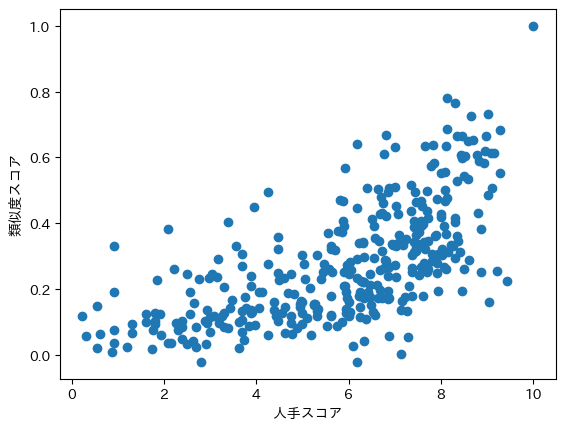

In [10]:
# グラフで描画
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.scatter(human_scores, pred_scores)
plt.xlabel('人手スコア')
plt.ylabel('類似度スコア')
plt.show()
# 相関がありそうなグラフになってる！

In [11]:
from scipy.stats import spearmanr
a = [0, 1, 2, 3, 4, 5]
b = [6, 5, 4, 2, 1, 0]
c, p = spearmanr(a, b)
print(c, p)  # -1.0, 0.0

-1.0 0.0


<h2 id="67-k-meansクラスタリング">67. k-meansクラスタリング</h2>
<p>国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．</p>


In [12]:
# 国と首都をquestion-wordsから持ってくる
# 集合にして重複を消す
countries = set()
# 国名フラグ
is_country = False
with open('data/questions-words.txt') as f:
    for line in f:
        line = line.rstrip()  # 改行を消す
        # タイトルでフラグ管理
        if line.startswith(':'):
            # 国名フラグを立てる
            if 'capital' in line:
                is_country = True
            else:
                is_country = False
            continue
        if is_country:
            countries.update(line.split(' '))

# 単語ベクトルにする
countries = list(countries)
country_vectors = []
for country in countries:
    country_vectors.append(model[country])

import numpy as np
country_vectors = np.array(country_vectors)

# 数の確認
print(country_vectors.shape)

# ファイルに書き込む
# with open('work/countries.txt', 'w') as f:
#     for country in countries:
#         f.write(f'{country}\n')

(232, 300)


In [13]:
# k-means法で教師なし学習
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
pred_clusters = kmeans.fit_predict(country_vectors)
# kmeansでクラスタリングした結果
print(pred_clusters)

# 次元削減して描画する
from sklearn.decomposition import PCA
model_pca = PCA(n_components=2)
country_vectors_2 = model_pca.fit_transform(country_vectors)
print(country_vectors_2.shape)  # (データ数, 2)

[4 2 4 0 3 0 4 4 2 0 3 4 4 3 2 0 2 1 3 2 4 2 2 0 1 1 3 3 1 2 2 1 3 3 2 1 3
 1 1 3 2 1 4 4 1 2 4 1 2 1 1 2 1 3 2 2 4 4 1 4 2 0 3 4 1 1 3 3 2 0 2 0 2 2
 1 2 2 4 4 1 4 4 0 1 0 2 1 0 4 4 1 1 3 4 3 3 2 1 1 1 1 2 4 1 1 4 4 4 2 2 2
 0 4 4 0 0 4 3 3 2 4 4 2 2 3 4 2 3 4 3 2 3 1 4 0 4 2 3 0 1 2 2 4 2 1 2 3 3
 2 1 0 2 2 2 1 0 0 1 2 2 1 1 4 0 4 1 1 3 1 4 3 0 1 1 0 1 4 3 2 1 4 3 4 2 1
 1 2 3 1 1 0 0 4 3 4 1 0 0 4 1 2 1 1 4 2 1 1 3 4 4 2 4 0 2 1 4 4 4 2 0 2 2
 0 3 3 0 1 4 2 2 1 4]
(232, 2)


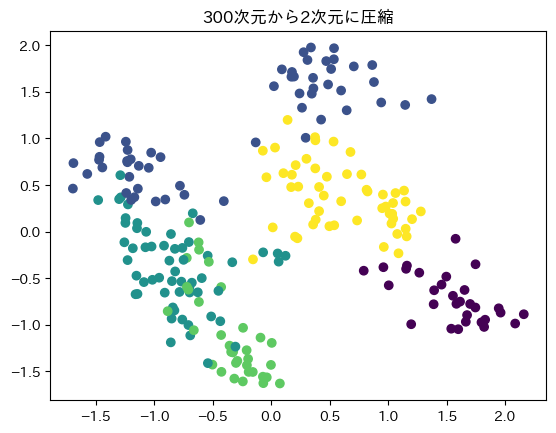

In [14]:
# 描画
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.scatter(country_vectors_2[:, 0], country_vectors_2[:, 1], c=pred_clusters)
plt.title('300次元から2次元に圧縮')
plt.show()

<h2 id="68-ward法によるクラスタリング">68. Ward法によるクラスタリング</h2>
<p>国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．</p>


Ward法：分散が最小になるようにクラスタリングをする方法  
デンドログラム：階層的クラスタリングにおける樹形図

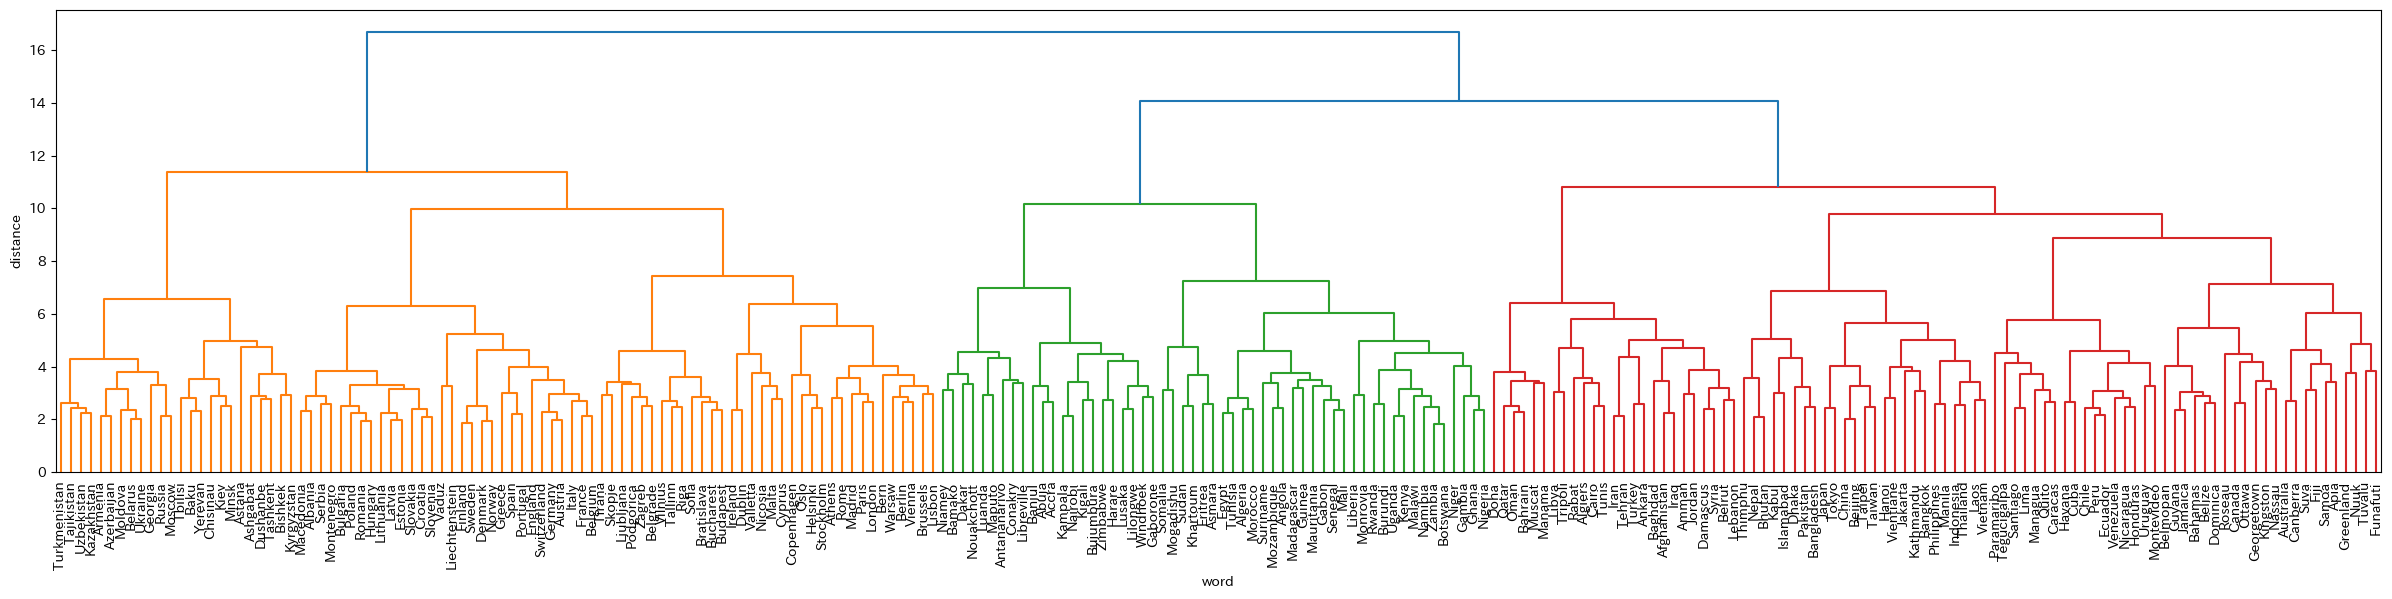

In [15]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage
import matplotlib.pyplot as plt
# 方法1, 単語ベクトルをwardに渡す
linkage = ward(country_vectors)

# 方法2, 単語ベクトルをward法でlinkageに渡す
# linkage = linkage(country_vectors, method='ward')

# 横長にする
plt.figure(figsize=(30, 6))
dendrogram(linkage, labels=countries, leaf_font_size=10)
plt.xlabel('word')
plt.ylabel('distance')
plt.show()

<h2 id="69-t-sneによる可視化">69. t-SNEによる可視化</h2>
<p>ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．</p>


/Users/nyuton/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nyuton/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(232, 2)


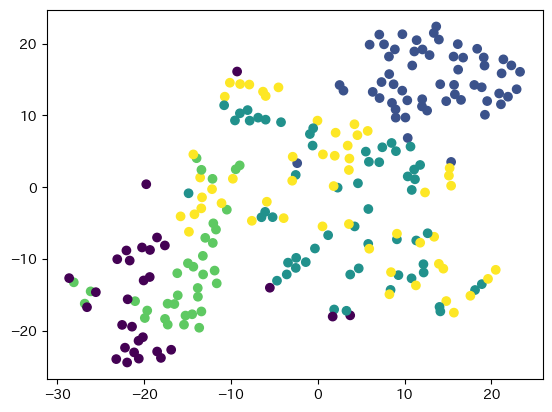

In [16]:
# 簡単版
from sklearn.manifold import TSNE
# perplexityを1から100まで変更して20がいい感じだったので採用
country_vectors_reduced = TSNE(n_components=2, random_state=0, perplexity=20).fit_transform(country_vectors)
print(country_vectors_reduced.shape)  # データ数 x 2次元
plt.scatter(country_vectors_reduced[:, 0], country_vectors_reduced[:, 1], c=pred_clusters)
plt.show()

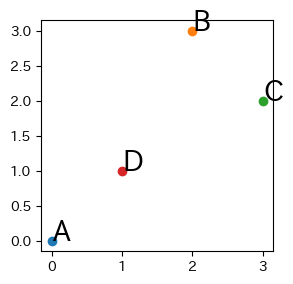

In [17]:
alist = [0, 2, 3, 1]
blist = [0, 3, 2, 1]
labels = ['A', 'B', 'C', 'D']
plt.figure(figsize=(3, 3))  # 先に形を変更して見やすくする
for a, b, label in zip(alist, blist, labels):
    plt.annotate(label, xy=(a, b), size=20)
    plt.scatter(a, b)  # 散布図を１点ずつ描画
plt.show()

/Users/nyuton/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nyuton/.pyenv/versions/anaconda3-2022.10/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


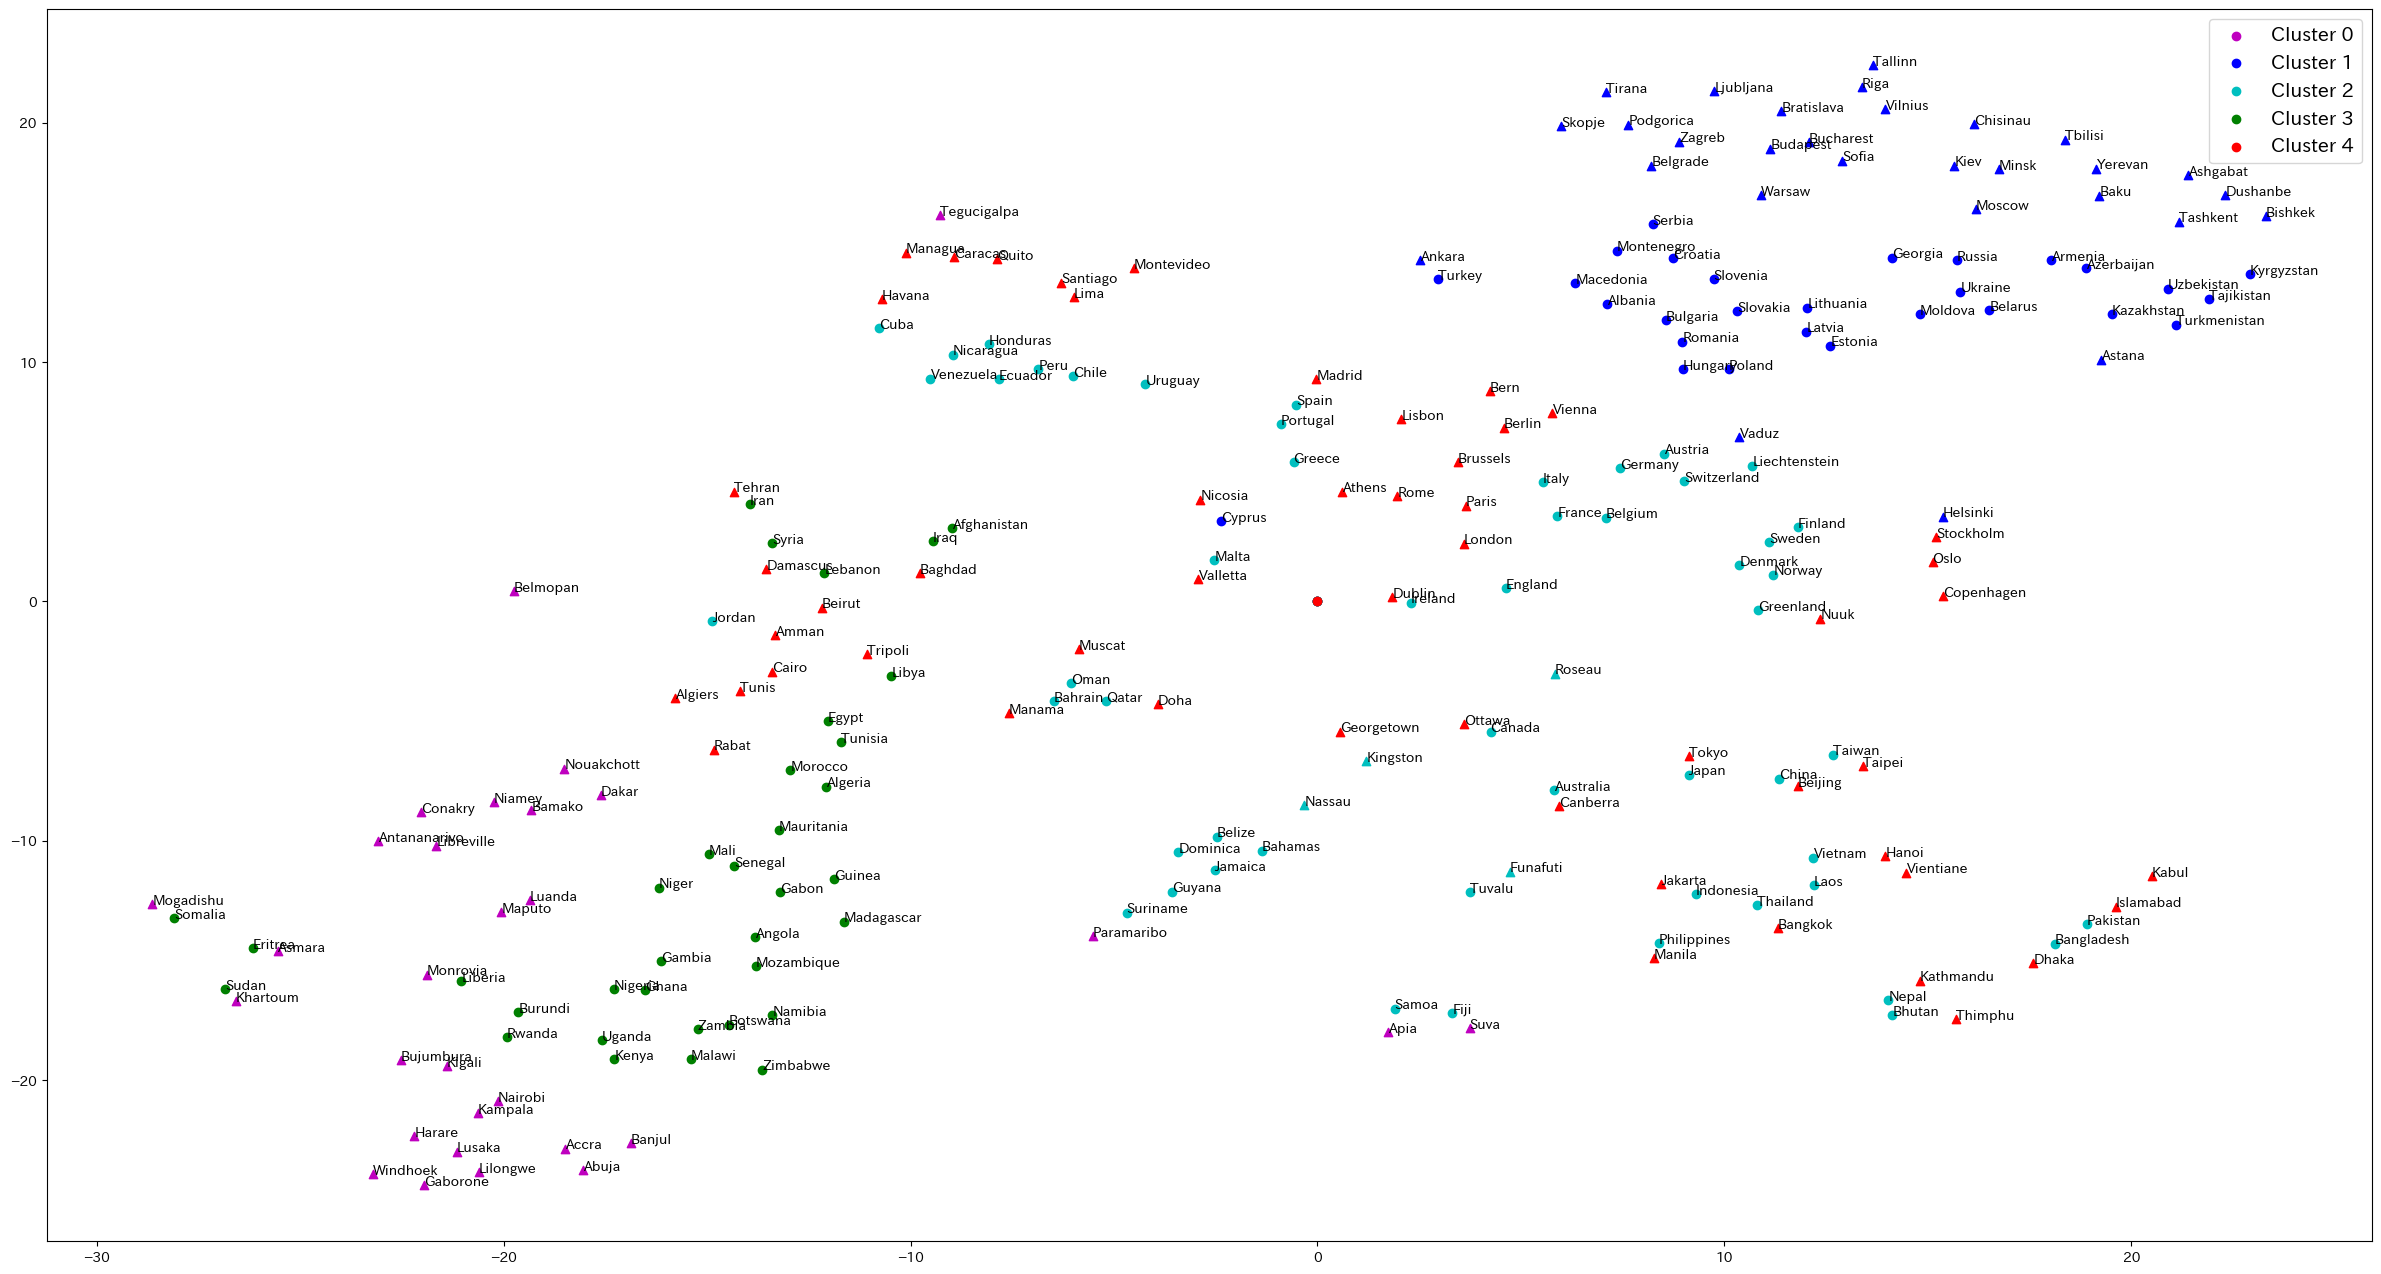

In [18]:
# 国と首都を分ける、ラベルを近くに表示する版
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

plt.figure(figsize=(30, 16))  # 横長にする
country_vectors_reduced = TSNE(n_components=2, random_state=0, perplexity=20).fit_transform(country_vectors)

# 国と首都を分ける, 国名 : 丸, 首都 : 三角
markers = {}
is_country = False
with open('data/questions-words.txt') as f:
    for line in f:
        line = line.rstrip()  # 改行を消す
        # タイトルでフラグ管理
        if line.startswith(':'):
            # 国名フラグを立てる
            if 'capital' in line:
                is_country = True
            else:
                is_country = False
            continue
        if is_country:
            capital1, country1, capital2, country2 = line.split(' ')
            # 国 : o, 首都 : ^
            markers[capital1] = '^'
            markers[capital2] = '^'
            markers[country1] = 'o'
            markers[country2] = 'o'
            
# plt.annotate でラベルを近くに表示する
for (x, y), country, cluster in zip(country_vectors_reduced, countries, pred_clusters):
    marker = markers[country]
    if cluster == 0: color = 'm'
    elif cluster == 1: color = 'b'
    elif cluster == 2: color = 'c'
    elif cluster == 3: color = 'g'
    elif cluster == 4: color = 'r'
    # 散布図を1点ずつ描画
    plt.scatter(x, y, marker=marker, color=color, label=cluster)
    # ラベルを同座標に書き込む
    plt.annotate(country, xy=(x, y))

dots = []
# 0, 0に点が打たれちゃう...
dots.append(plt.scatter(0, 0, color='m', marker='o'))
dots.append(plt.scatter(0, 0, color='b', marker='o'))
dots.append(plt.scatter(0, 0, color='c', marker='o'))
dots.append(plt.scatter(0, 0, color='g', marker='o'))
dots.append(plt.scatter(0, 0, color='r', marker='o'))

labels = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4']
plt.legend(dots, labels, loc="upper right", fontsize=14)
# plt.scatter(country_vectors_reduced[:, 0], country_vectors_reduced[:, 1], c=pred_clusters)
plt.show()

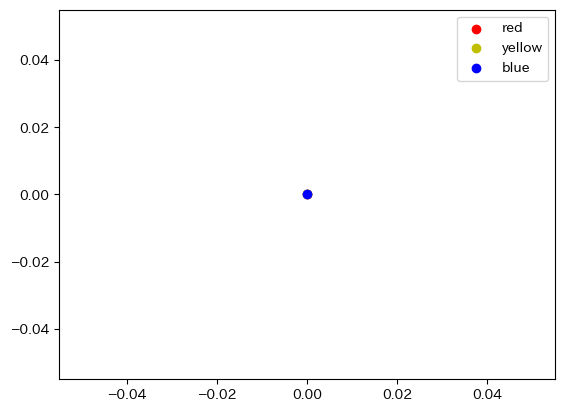

In [19]:
import matplotlib.pyplot as plt
dots = []
dots.append(plt.scatter(0, 0, color='r'))
dots.append(plt.scatter(0, 0, color='y'))
dots.append(plt.scatter(0, 0, color='b'))
labels = ['red', 'yellow', 'blue']
plt.legend(dots, labels)
plt.show()